MNIST Classification
=================

In [1]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from pyautospec import parallel_plot, DatasetMps

In [2]:
digits = load_digits()

<IPython.core.display.Javascript object>


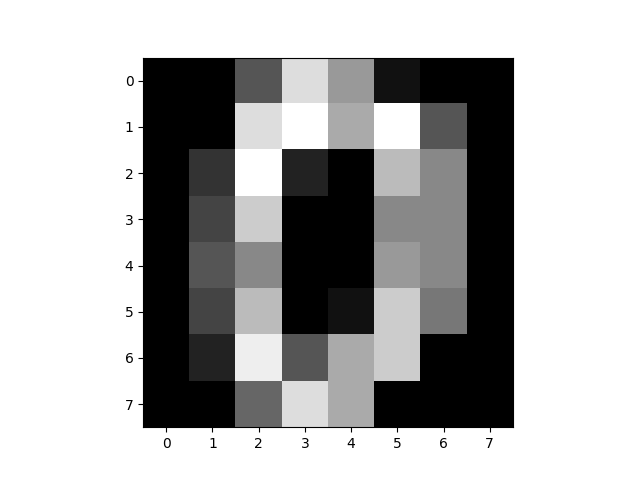

In [3]:
plt.imshow(digits.images[0], cmap='gray');

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [12]:
digits_mps = DatasetMps(64, x0=np.zeros((64,)), x1=16*np.ones((64,)), max_bond_d=100, class_n=10)

digits_mps

  DatasetMps

  ╭───┐ ╭───┐       ╭─┴─┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 64│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
     class dim:  10
      bond dim:   2 (max: 100)
          type: classification
        

In [13]:
digits_mps.fit(X_train, y_train, learn_rate=0.1, batch_size=200, epochs = 10)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch   10: 0.24


  DatasetMps

  ╭───┐ ╭───┐       ╭─┴─┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 64│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
     class dim:  10
      bond dim: 100 (max: 100)
          type: classification
        

In [14]:
print("accuracy (train): {:.1f}%".format(100 * digits_mps.score(X_train, y_train)))
print("accuracy (test):  {:.1f}%".format(100 * digits_mps.score(X_test, y_test)))

accuracy (train): 97.5%
accuracy (test):  95.7%
